In [1]:
import numpy as np

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
# Train과 Test 분리
from sklearn.model_selection import train_test_split

In [4]:
train_input, test_input, train_target, test_target = \
  train_test_split(fish_length, fish_weight, random_state=42)

In [5]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [9]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [10]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

---
### 길이가 50cm인 생선의 무게를 예측

In [14]:
knr.predict([[50]])

array([1033.33333333])

### 기존 데이터로 무게 확인

In [16]:
train_target.max()

1100.0

In [17]:
train_input.max()

44.0

### 산점도로 이웃을 구해서 확인해보자

In [18]:
import matplotlib.pyplot as plt

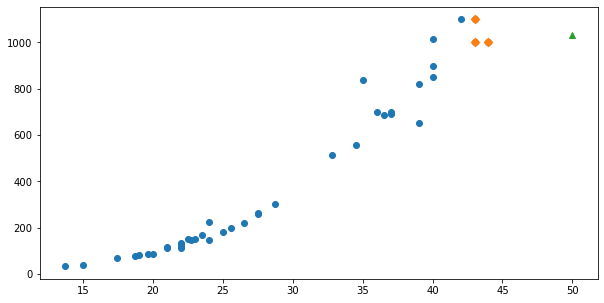

In [21]:
# 50cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 50cm 생선
plt.scatter(50, 1033, marker="^")

plt.show()

In [22]:
# ???
knr.predict([[100]])

array([1033.33333333])

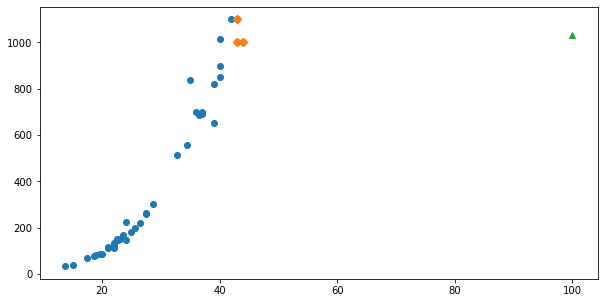

In [24]:
# 100cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 100cm 생선
plt.scatter(100, 1033, marker="^")

plt.show()

> 최대값 이후 값들은 다 예측값이 같을 것이다

---
### 선형회귀(Linear Regression)
: 직선이나 곡선의 함수식(Y=aX + b)을 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(train_input, train_target)

LinearRegression()

In [28]:
lr.predict([[50]])

array([1241.83860323])

In [30]:
# Y = aX + b에서 기울기와 절편을 출력해보자 (Depp Learning에서는 Weight와 Bias로 불림)
# coef_ --> 기울기, intercept_ --> 절편
# 기울기는 다항 함수로 나오면 여러개가 나올 수 있기 때문에 []형식으로 나온다
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


### 산점도 그려보기

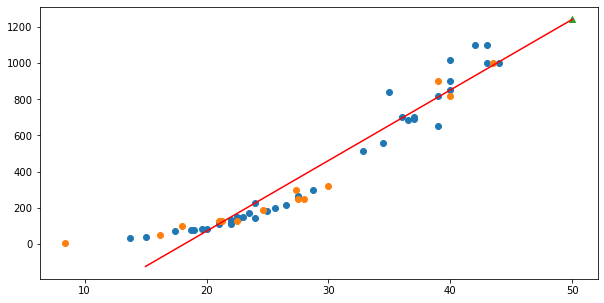

In [39]:
# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 테스트세트의 산점도를 그립니다.
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot(
  [15, 50],
  [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
  c="red"
)

# 50cm 생선 데이터
plt.scatter(50, 1241.8, marker="^")

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수가 발생할 수 있다.    
> 절편이 음수이다.   

In [38]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


> 과대적합이 발생 --> 컬럼도 하나고 조정할 hyper parameter도 없기 때문에 다른 방식을 이용해 과대적합을 해결해야 한다   
> 그 방법이 다항 회귀식을 사용하는 것

---
### 다항 회귀
Y=$aX^2$ + bX + C
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중 회귀라고 한다

In [41]:
# Feature를 제곱한 Column을 생성하여 기존의 Column에 붙인다

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [42]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [43]:
lr = LinearRegression()

In [44]:
lr.fit(train_poly, train_target)

LinearRegression()

In [45]:
# 50cm 생선 예측 (1241.8)
lr.predict([[50**2, 50]])

array([1573.98423528])

In [46]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


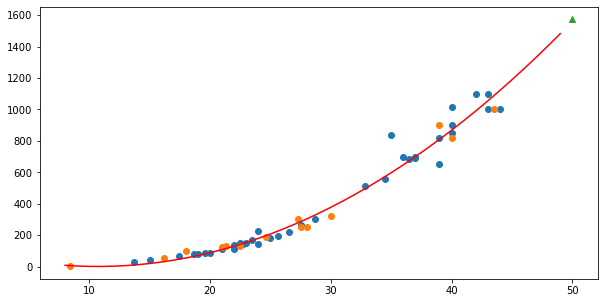

In [52]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만듭니다.
point = np.arange(8, 50)


# 산점도
# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 테스트세트의 산점도를 그립니다.
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot(
  point,
  1.01*point**2 - 21.6 * point + 116.05,
  c="red"
)

# 50cm 생선 데이터
plt.scatter(50, 1573.98, marker="^")

plt.show()

In [53]:
# 과대적합과 과소적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


> 약간의 과소적합이 발생하지만 단순회귀 보다는 다항 회귀가 진전이 있었다